In [27]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from scipy.special import comb
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Desafio 1: Entendendo o consumidor.
-- Dificuldade: Média.


Suponha que você trabalha em uma empresa de produtos de beleza populares e, com
a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,
pediu a sua ajuda e gostaria de entender se : 

1. isso de fato aconteceu 

2. quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar
melhor os seus anúncios. Para isso, eles te enviaram a base de dados
(desafio_01_consumidor.csv). Como você poderia ajudá-los?
Para responder esse desafio:
A base de dados: desafio_01_consumidor.csv contém informações de seus clientes
(anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o
dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.



1. Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia

a. Identifique as distribuições

b. Plote histogramas / boxplots


In [3]:
dados_consumidor = pd.read_csv('../dados/desafio-01-consumidor.csv')

In [4]:
dados_consumidor.head(10)

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
5,XXXXXXX60,29,8055,batom,Nordeste,1
6,XXXXXXX73,22,9343,batom,Nordeste,1
7,XXXXXXX31,31,3748,batom,Sudeste,1
8,XXXXXXX13,34,3118,desodorante,Nordeste,1
9,XXXXXXX65,47,7404,batom,Sul,1


In [14]:
#quantidade de dados e colunas
dados_consumidor.shape


(203, 6)

In [15]:
#idade dos consumidores no geral
print('De %s até %s anos' % (dados_consumidor.idade.min(), dados_consumidor.idade.max()))

De 15 até 80 anos


In [52]:
#idade dos consumidores no pré e pós pandemia

labels = { 1: 'Pré-pandemia', 0: 'Pós-pandemia'}

idade = pd.crosstab(
    dados_consumidor['idade'],
    dados_consumidor['pre-pandemia'],
    rownames = ['Categorias'],
    colnames=['Idade dos Clientes']
)

idade.rename(columns= labels, inplace = True)

idade[:5]


Idade dos Clientes,Pós-pandemia,Pré-pandemia
Categorias,,
15,1,0
16,0,1
17,2,1
19,0,1
20,0,2


In [53]:
# idade média pré 
pre_pandemia = dados_consumidor[(dados_consumidor['pre-pandemia'] == 1)]
idade_pre = pre_pandemia['idade'].mean()
print(f'A idade média dos cliente pré-pandemia é de {round(idade_pre)}.')

A idade média dos cliente pré-pandemia é de 40.


In [55]:
# idade média pós pandemia
pre_pandemia = dados_consumidor[(dados_consumidor['pre-pandemia'] == 0)]
idade_pos = pre_pandemia['idade'].mean()
print(f'A idade média dos cliente pós-pandemia é de {round(idade_pos)}.')

A idade média dos cliente pós-pandemia é de 45.


In [16]:
#regiões 
qualitativaNominal1 = sorted(dados_consumidor['regiao-BR'].unique())
qualitativaNominal1

['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

In [17]:
#produtos que foram vendidos
qualitativaNominal2 = sorted(dados_consumidor['produto'].unique())
qualitativaNominal2

['antissinais', 'base', 'batom', 'desodorante', 'perfume', 'sombra']

### Distribuição de frequências para variável renda

In [ ]:
dados_consumidor.renda.min()

110

In [ ]:
dados_consumidor.renda.max()

30000

In [ ]:
# salario minimo hoje R$1212 --> 2,4,6,8,mais que oito

classes = [110, 2424, 4848, 7272, 9696, 30000]
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = dados_consumidor.renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
percentual = pd.value_counts(
    pd.cut(x = dados_consumidor.renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)

#renomeando as colunas
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
# ordenando as "categorias"
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,122,0.600985
B,24,0.118227
C,29,0.142857
D,17,0.083744
E,11,0.054187


<AxesSubplot:title={'center':'Distribuição de Frequências - Renda'}, xlabel='R$'>

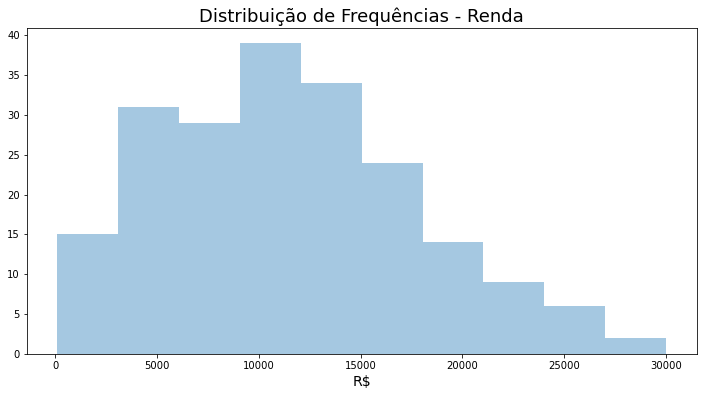

In [ ]:
ax = sns.distplot(dados_consumidor.renda, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax


### Distribuição produtos mais vendidos antes e depois da pandemia

In [11]:
# totais dos produtos mais comprados -- visão geral

frequencia = dados_consumidor['produto'].value_counts() # contagem
percentual = dados_consumidor['produto'].value_counts(normalize = True) * 100 # percentual

dist_freq_qualitativas = pd.DataFrame({'Frequencia':frequencia,'Porcentagem (%)':round(percentual,2)})
dist_freq_qualitativas

,Frequencia,Porcentagem (%)
batom,76,37.44
desodorante,66,32.51
antissinais,29,14.29
sombra,13,6.40
perfume,12,5.91
base,7,3.45


In [12]:
#produtos vendidos pré pandemia

pre_pandemia = dados_consumidor[(dados_consumidor['pre-pandemia'] == 1)]
frequencia_pre = pre_pandemia['produto'].value_counts()
porcentagem_pre =  pre_pandemia['produto'].value_counts(normalize = True) * 100 # percentual

dist_freq_qualitativas_pre = pd.DataFrame({'Frequencia':frequencia_pre,'Porcentagem (%)':round(porcentagem_pre,2)})
dist_freq_qualitativas_pre

,Frequencia,Porcentagem (%)
batom,61,60.40
desodorante,20,19.80
antissinais,9,8.91
perfume,4,3.96
sombra,4,3.96
base,3,2.97


In [13]:
#produtos vendidos pós pandemia
pos_pandemia = dados_consumidor[(dados_consumidor['pre-pandemia'] == 0)]
frequencia_pos = pos_pandemia['produto'].value_counts()
porcentagem_pos =  pos_pandemia['produto'].value_counts(normalize = True) * 100 # percentual

dist_freq_qualitativas_pos = pd.DataFrame({'Frequencia':frequencia_pos,'Porcentagem (%)':round(porcentagem_pos,2)})
dist_freq_qualitativas_pos

,Frequencia,Porcentagem (%)
desodorante,46,45.10
antissinais,20,19.61
batom,15,14.71
sombra,9,8.82
perfume,8,7.84
base,4,3.92


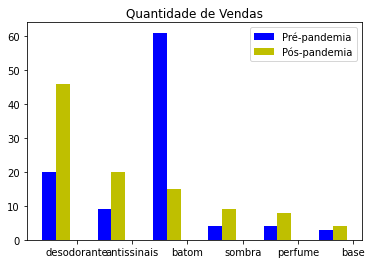

In [33]:

# Quantidade de vendas para o Produto A
valores_produto_pre = [20, 9, 61, 4, 4, 3]

# Quantidade de vendas para o Produto B
valores_produto_pos = [46, 20, 15, 9, 8, 4] 

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_pre))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, valores_produto_pre, width=0.25, label = 'Pré-pandemia', color = 'b')
plt.bar(x2, valores_produto_pos, width=0.25, label = 'Pós-pandemia', color = 'y')

# coloca o nome dos produtos como label do eixo x
meses = ['desodorante', 'antissinais', 'batom', 'sombra', 'perfume', 'base']
plt.xticks([x + 0.25 for x in range(len(valores_produto_pre))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Quantidade de Vendas")
plt.show()

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)


### Amostragem

3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?

#### Fórmula usada

![imagem](https://media-exp1.licdn.com/dms/image/C4E12AQET0yMpgxEXhg/article-inline_image-shrink_1000_1488/0/1586443913114?e=1651104000&v=beta&t=yZ85NwQSS4K_e3YdV6OtFjtPY7iebfbj8mmfmtug0Us)

In [39]:
#Amostragem quantitativa

N = 1000000 #total de clientes
e = 0.02 # margem de erro

def tamanhoAmostra(e,N):

    n = (N / (1 + (N*(e**2))))

    return (n)



print(round(tamanhoAmostra(e, N)))

2494
